# Visualize profiling results

Placeholder notebook for visualizing profiling results.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

analog_df = pd.read_csv("analog_profiling_results.csv")
naive_df = pd.read_csv("naive_profiling_results.csv")

#### Line charts of forecast day number vs error

In [12]:
def plot_error_by_fday_line_chart(ax, varname, anomaly_search, spatial_domain):
    query_str = "spatial_domain == @spatial_domain & variable == @varname & anomaly_search == @anomaly_search"
    plot_df = naive_df.query(query_str)[["forecast_day_number", "naive_2.5", "naive_50", "naive_97.5"]].set_index("forecast_day_number")
    plot_df = plot_df.join(analog_df.query(query_str).groupby("forecast_day_number")["forecast_error"].mean().rename("mean_analog_error"))
    plot_df.plot(title=f"{varname}, {spatial_domain}, anomaly_search={anomaly_search}", ax=ax)
    ax.set_ylabel("RMSE")

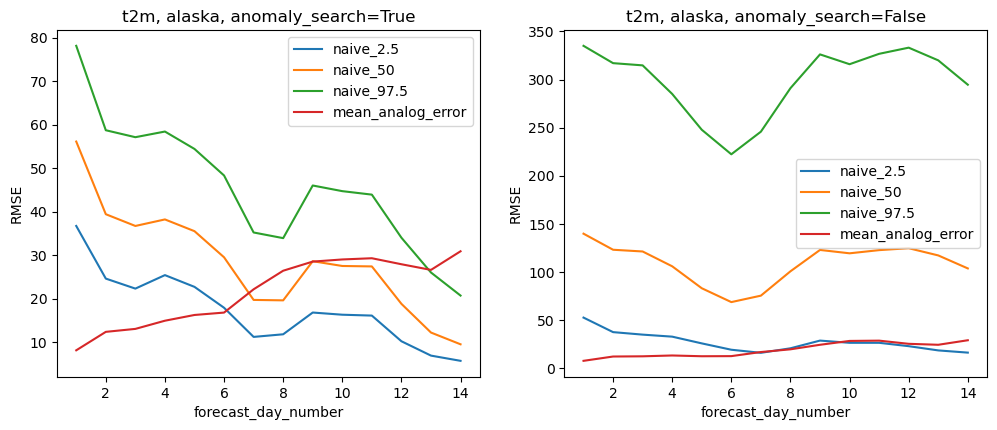

In [13]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 4.5))

plot_error_by_fday_line_chart(axes[0], "t2m", True, "alaska")
plot_error_by_fday_line_chart(axes[1], "t2m", False, "alaska")

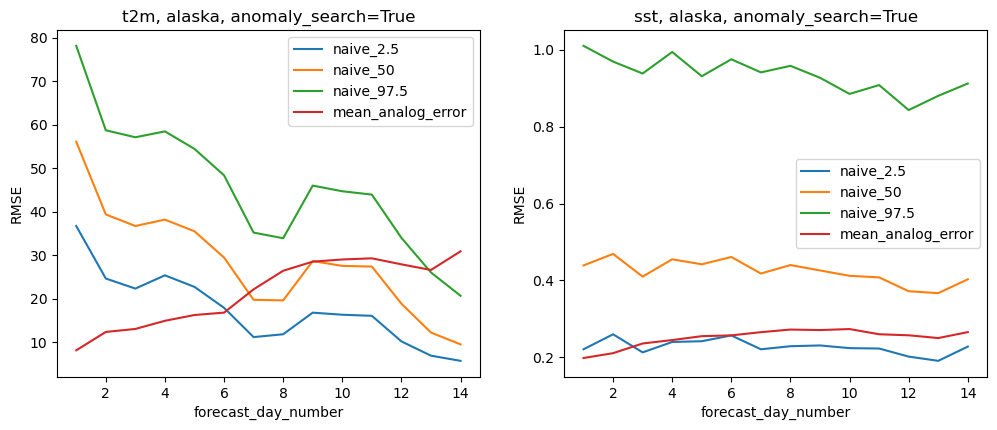

In [16]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 4.5))

plot_error_by_fday_line_chart(axes[0], "t2m", True, "alaska")
plot_error_by_fday_line_chart(axes[1], "sst", True, "alaska")

Text(0, 0.5, 'RMSE')

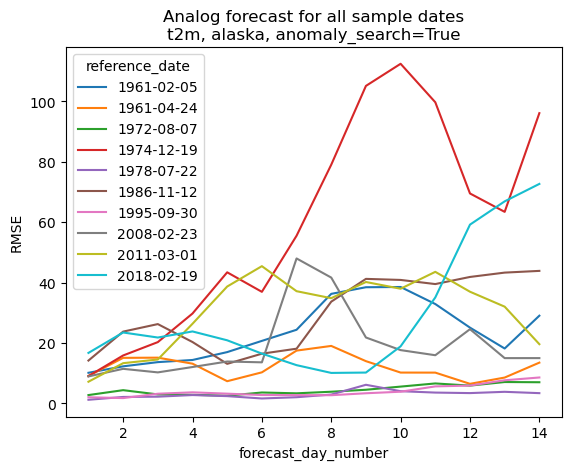

In [61]:
ax = analog_df.query(query_str).pivot(index='forecast_day_number', columns='reference_date', values='forecast_error').plot(title=f"Analog forecast for all sample dates\n{varname}, {spatial_domain}, anomaly_search={anomaly_search}")
ax.set_ylabel("RMSE")